**Importing Libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np



**Downloading MNIST Dataset**

In [2]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.mnist.load_data()



11493376/11490434 [==============================] - 0s 0us/step


**Normalizing Images, expanding dimension and Coverting them into Tensors**

In [3]:
train_images=train_images.astype('float32')/255 #normalizing images 
train_images=tf.expand_dims(train_images,axis=3) # expanding dimension

test_images=test_images.astype('float32')/255 #normalizing images 
test_images=tf.expand_dims(test_images,axis=3) # expanding dimension

In [4]:
train_images.shape

TensorShape([60000, 28, 28, 1])

In [5]:
train_ds=tf.data.Dataset.from_tensor_slices((train_images,train_labels))
train_ds=train_ds.shuffle(1000).batch(32)
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))
test_ds=test_ds.shuffle(1000).batch(32)

In [6]:
train_ds

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.uint8)>

**Defining Model**

In [7]:
def get_model():
  model=tf.keras.Sequential([
  layers.Conv2D(64,3,activation='relu'),
  layers.Conv2D(32,3,activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128,activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(10,activation='softmax')


  ])

  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

  return model

**Running the model and Plotting loss and accuracy graph**

In [8]:
model=get_model()
hist=model.fit(train_ds,epochs=5,validation_data=test_ds)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1927 - accuracy: 0.9427 - val_loss: 0.0435 - val_accuracy: 0.9861
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0842 - accuracy: 0.9754 - val_loss: 0.0400 - val_accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0654 - accuracy: 0.9803 - val_loss: 0.0384 - val_accuracy: 0.9868
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0559 - accuracy: 0.9825 - val_loss: 0.0300 - val_accuracy: 0.9906
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0460 - accuracy: 0.9855 - val_loss: 0.0330 - val_accuracy: 0.9896


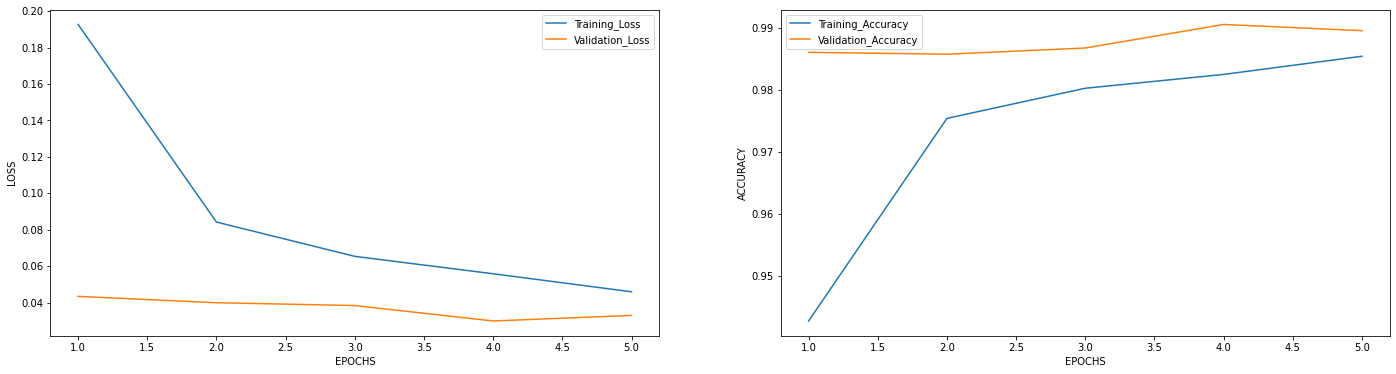

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
training_loss=hist.history['loss']
validation_loss=hist.history['val_loss']
training_acc=hist.history['accuracy']
validation_acc=hist.history['val_accuracy']

epochs=range(1,6)
fig, ax = plt.subplots(1, 2, figsize=(24, 6) )

ax[0].plot(epochs,training_loss,label='Training_Loss')
ax[0].plot(epochs,validation_loss,label='Validation_Loss')
ax[0].set_xlabel('EPOCHS')
ax[0].set_ylabel('LOSS')
ax[0].legend()
ax[1].plot(epochs,training_acc,label='Training_Accuracy')
ax[1].plot(epochs,validation_acc,label='Validation_Accuracy')
ax[1].set_xlabel('EPOCHS')
ax[1].set_ylabel('ACCURACY')
ax[1].legend()
plt.show()


**Saving model and Testing model for some random images**

In [38]:
model.save('live_project_model.h5')

Label : 9
Prediction : 9


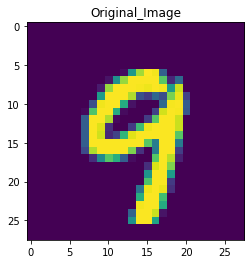

Label : 3
Prediction : 3


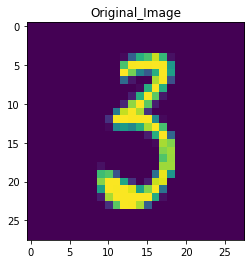

Label : 5
Prediction : 5


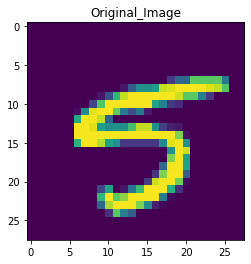

Label : 2
Prediction : 2


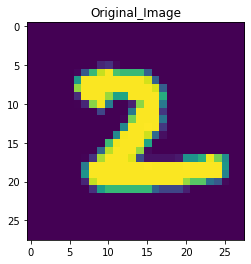

Label : 4
Prediction : 4


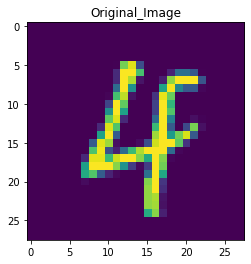

In [73]:
index=np.random.randint(0,10000,5)
def plot_prediction(i):
  tf.squeeze(test_images[i])
  test =test_images[i]
  plt.imshow(tf.squeeze(test_images[i]))
  plt.title('Original_Image')
  print('Label :',test_labels[i])
  test =tf.expand_dims(test,axis=0)
  print('Prediction :',model.predict(test).argmax())
  plt.show()

for i in index:
  plot_prediction(i)

  